In [46]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100 * 100)

--2025-10-04 11:56:23--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-10-04 11:56:23--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-10-04 11:56:24--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... conne

In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [48]:
print(pca.components_.shape)

(50, 10000)


In [49]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


In [50]:
print(pca.explained_variance_[48] - pca.explained_variance_[49])

2166.667478949734


In [51]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


In [52]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

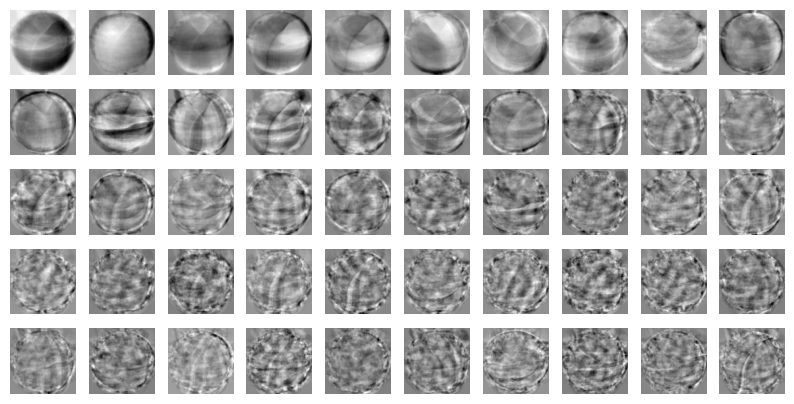

In [53]:
# 50개 주성분을 100 x 100 이미지로 출력
draw_fruits(pca.components_.reshape(-1, 100, 100))

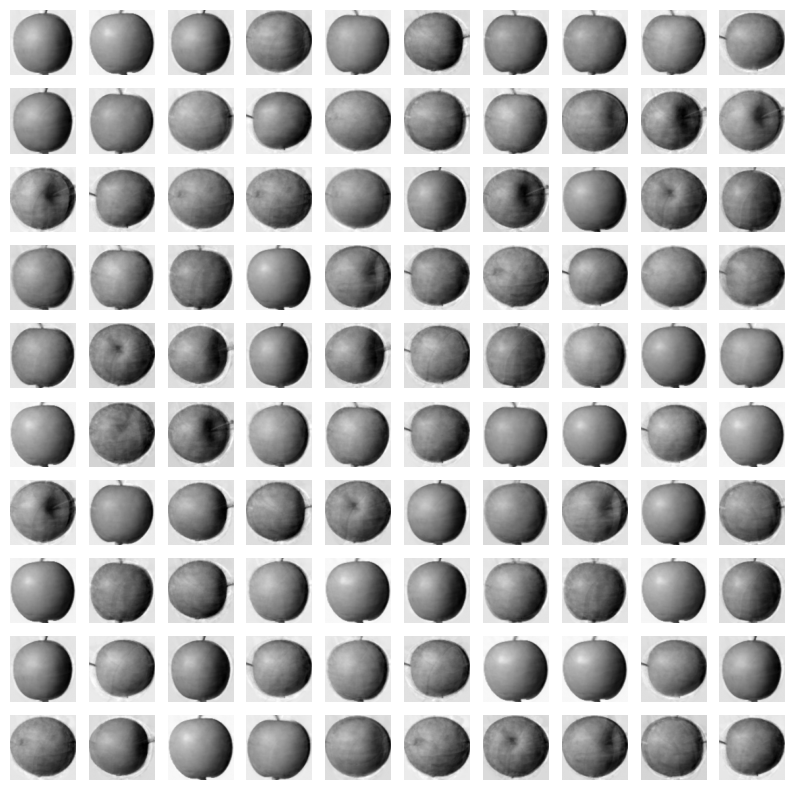

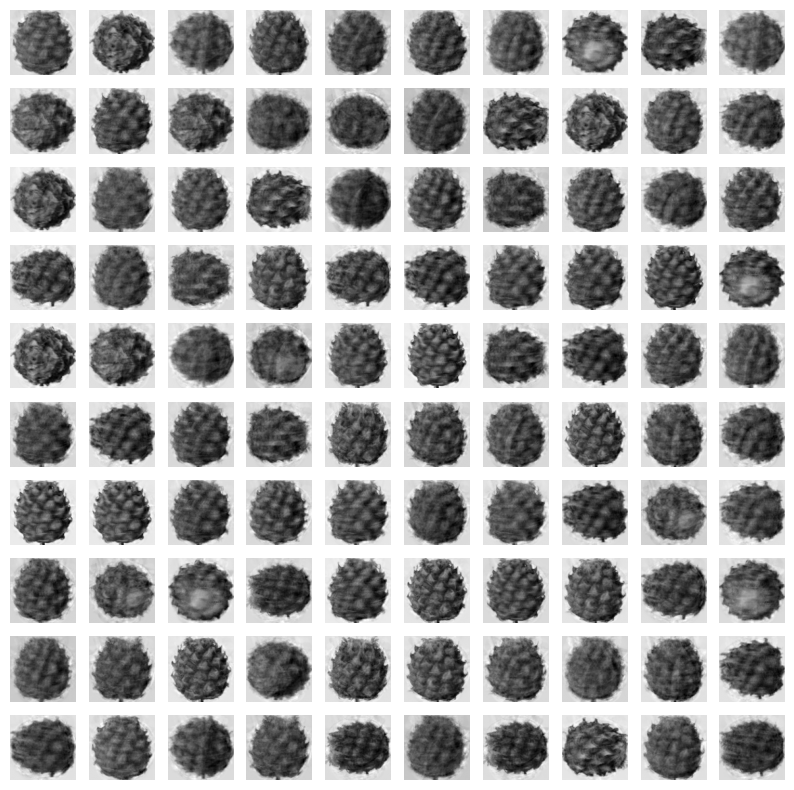

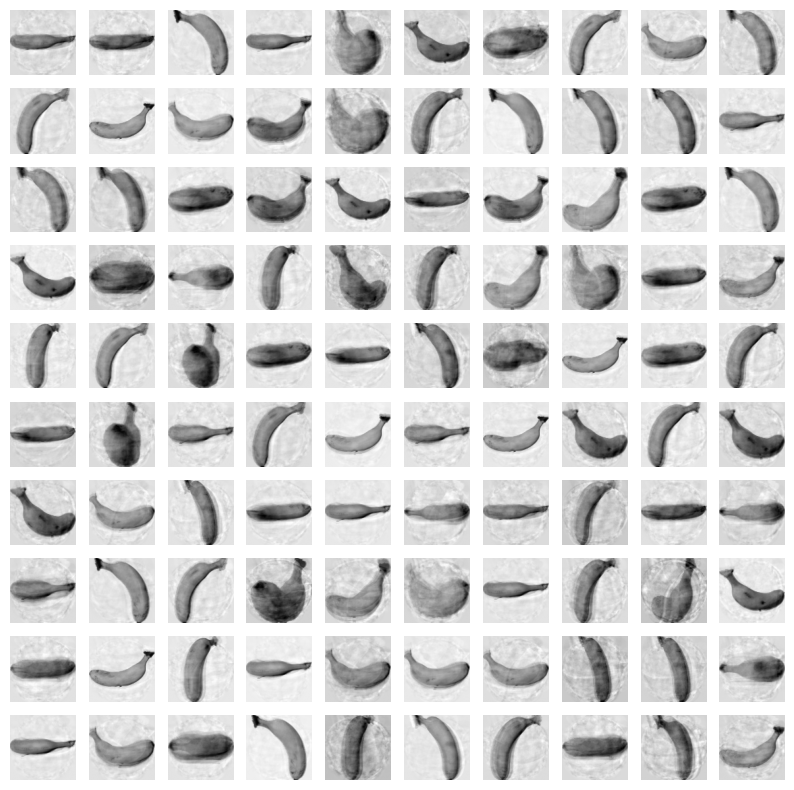

In [54]:
# 50개 주성분을 10,000개 특징으로 복원하여 100 x 100 이미지로 출력
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

# 출력 결과, 원본 데이터를 거의 완벽하게 재구성함
# 즉, 주성분을 최대로 사용하였다면 완벽하게 원본 데이터를 재구성 할 수 있다.

In [55]:
# 각 주성분의 분산 출력(설명된 분산이라고 표현함)
print(np.sum(pca.explained_variance_ratio_))

0.9215359255536882


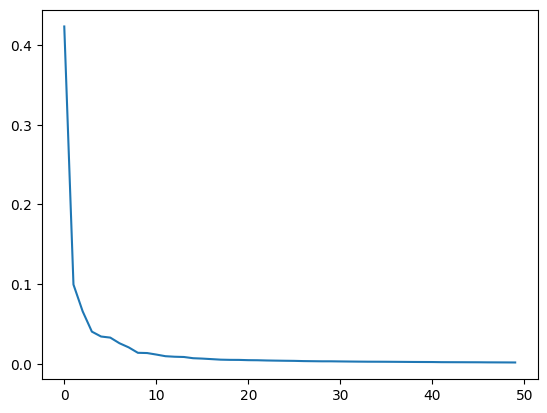

In [56]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [57]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [58]:
target = np.array([0]*100 + [1]*100 + [2]*100)

In [59]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.1981685638427735


In [60]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.02470879554748535


In [61]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [62]:
print(pca.n_components_)

2


In [63]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


(300, 10000)


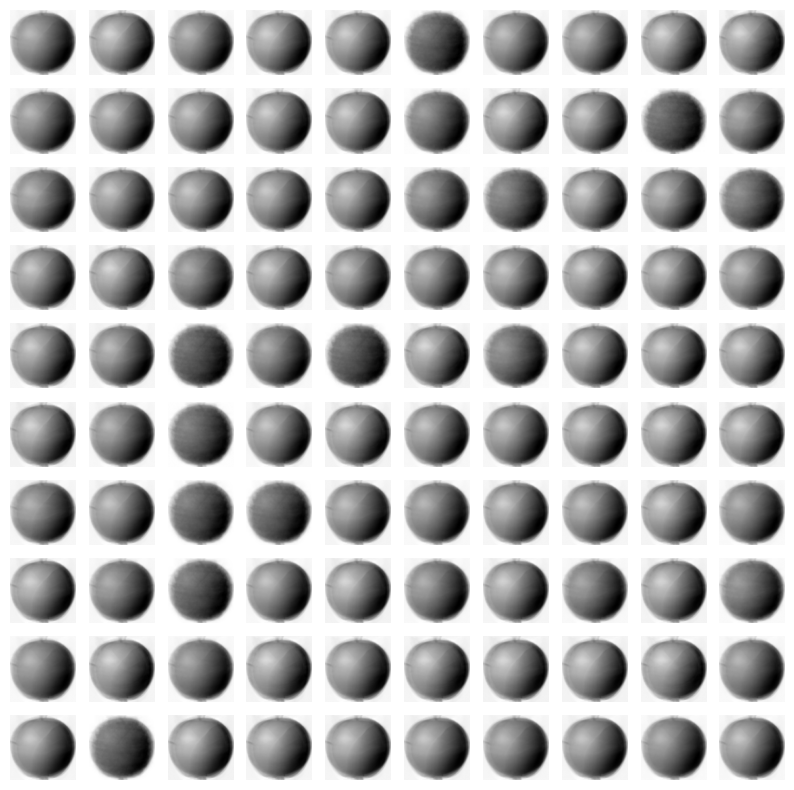

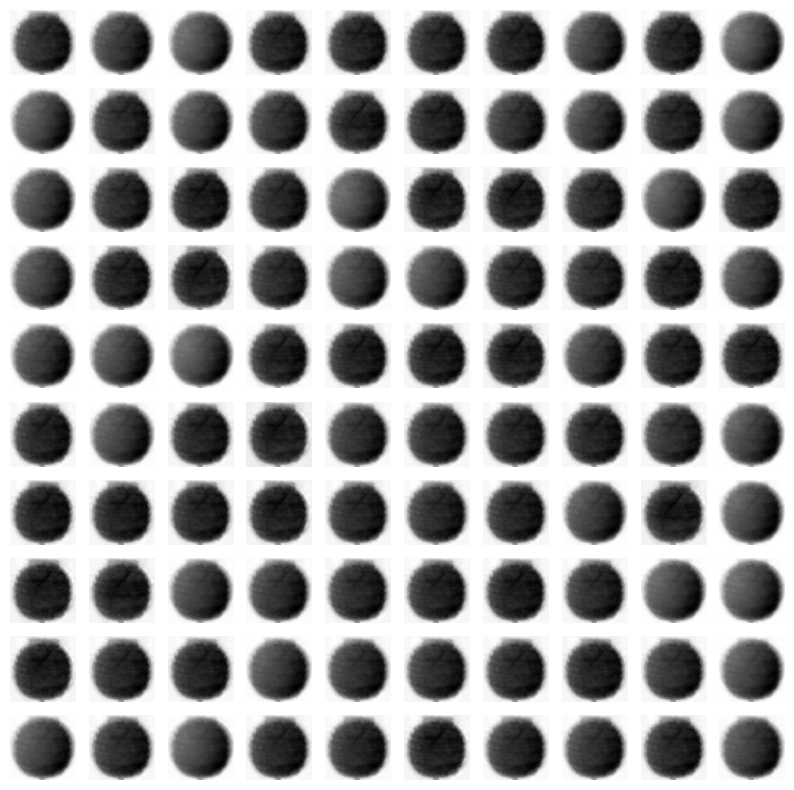

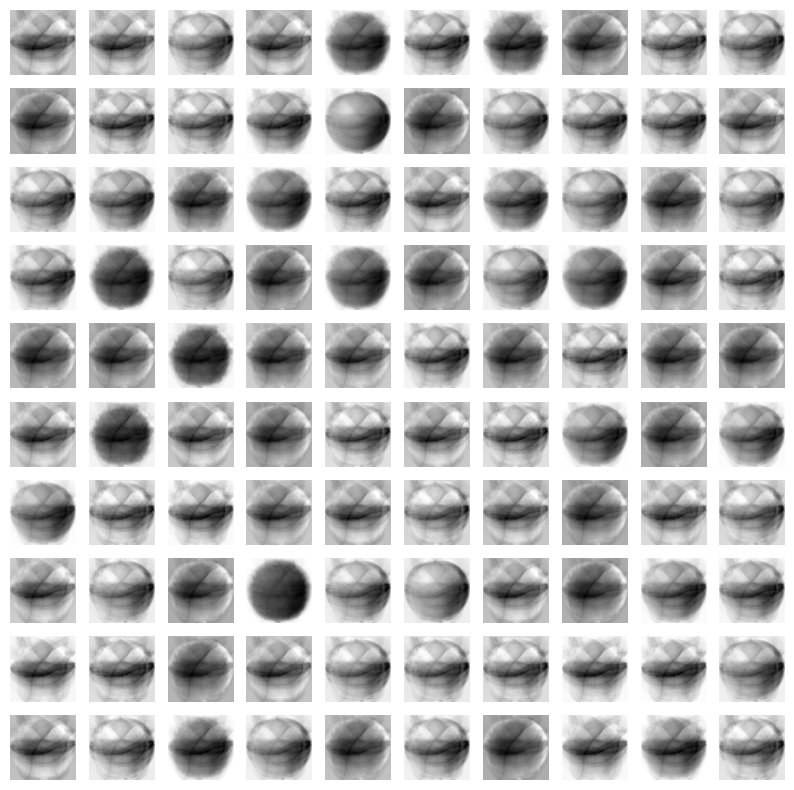

In [64]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

# 2개 주성분을 10,000개 특징으로 복원하여 100 x 100 이미지로 출력
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

# 출력 결과, 원본 데이터를 거의 완벽하게 재구성함
# 즉, 주성분을 최대로 사용하였다면 완벽하게 원본 데이터를 재구성 할 수 있다.

In [65]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.99
0.04880928993225098


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [66]:
# 차원 축소된 데이터 바탕으로 k-평균 알고리즘을 사용한 클러스터를 찾는다.
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


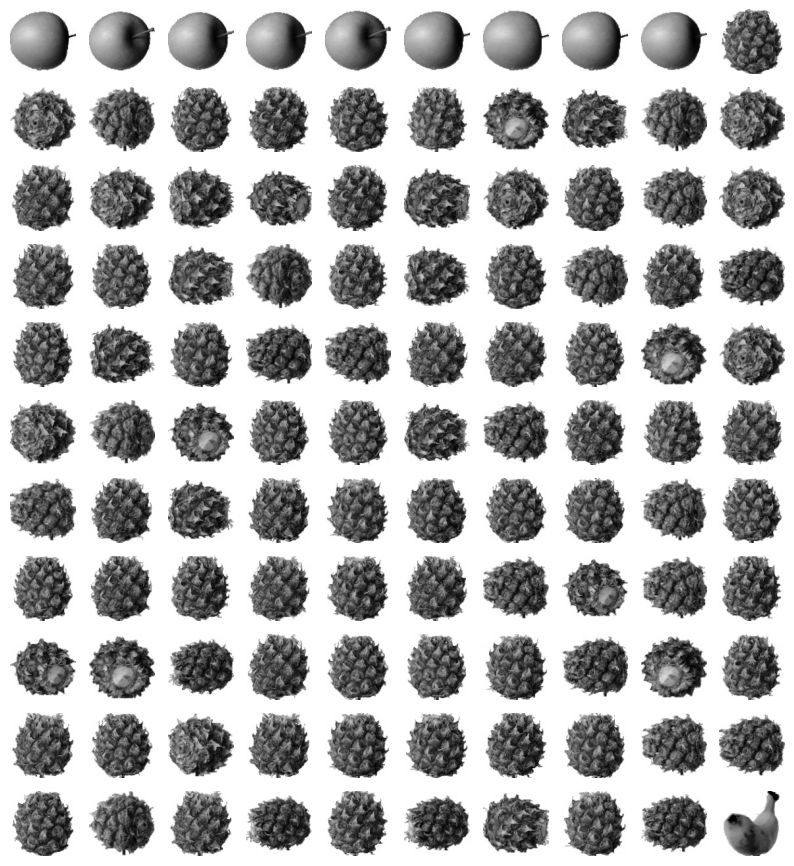

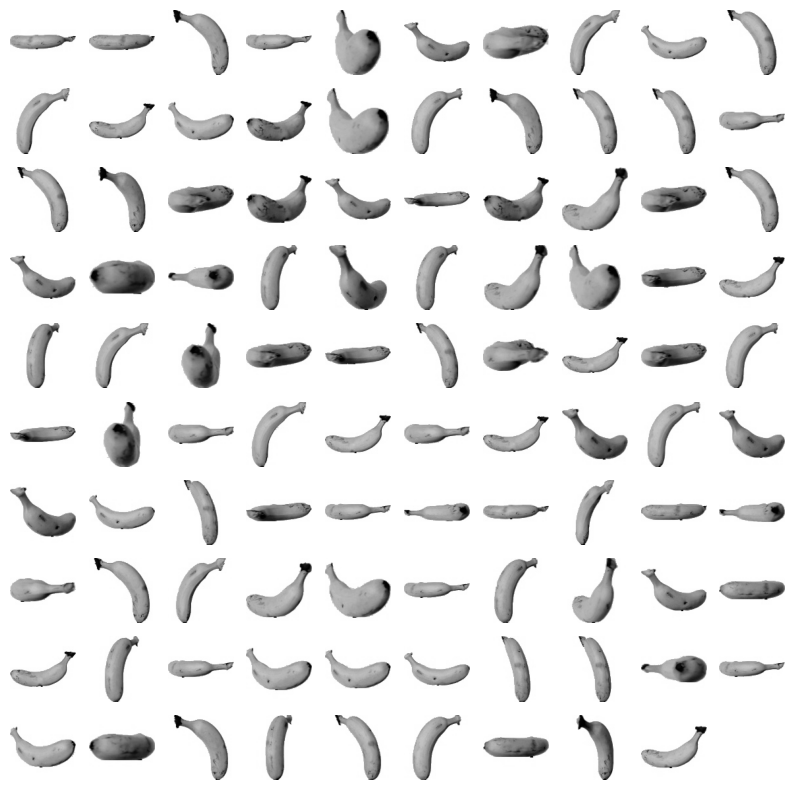

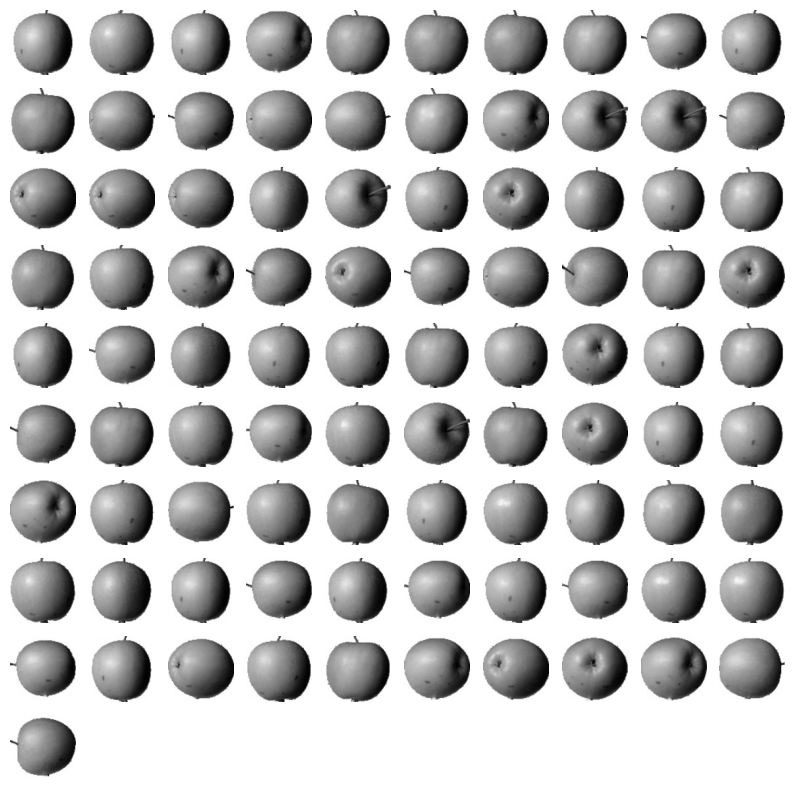

In [67]:
# KMeans가 찾은 레이블을 사용하여 과일 이미지 출력
for label in range(0, 3):
  draw_fruits(fruits[km.labels_ == label])
  print("\n")

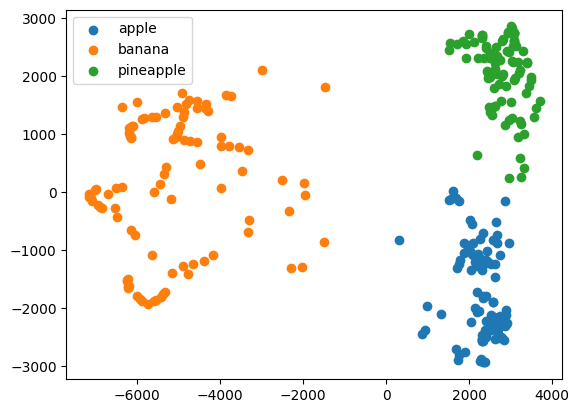

In [69]:
# KMeans가 찾은 클러스터를 바탕으로 각 클러스터의 산점도 표현
for label in range(0, 3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()